<a href="https://colab.research.google.com/github/juma-paul/deep_learning/blob/main/linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression: Closed-form solution, Stochastic Mini-batch Gradient Descent

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_boston_houses_dataset = '/content/drive/MyDrive/Datasets/boston_houses.csv'

In [ ]:
houses = pd.read_csv(file_path_boston_houses_dataset)

In [ ]:
houses.shape

(506, 21)

In [ ]:
houses.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Correlation heatmap to identify relationships between features

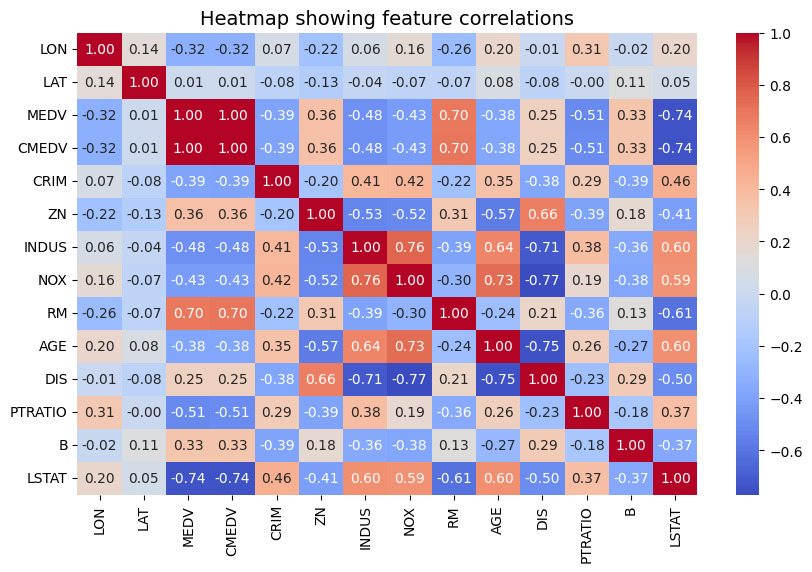

In [ ]:
numeric_columns = houses.select_dtypes('float64', 'int64')
plt.figure(figsize=(10, 6))
corr_matrix = numeric_columns.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap showing feature correlations', fontsize=14)
plt.show()

##### MEDV and RM have a correlation coefficient of 0.70, which is high in this case. Therefore, I will use these two features for perfoming the linear regression tasks

## Extract feature that is Highly correlated to the target

In [ ]:
houses = houses[['RM', 'MEDV']].copy()

In [ ]:
houses.rename(columns={'RM': 'Rooms', 'MEDV': 'Price'}, inplace=True)

In [ ]:
houses.head()

,Rooms,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


# Tasks

## 1. Plot Regression Line with regplot (Seaborn)

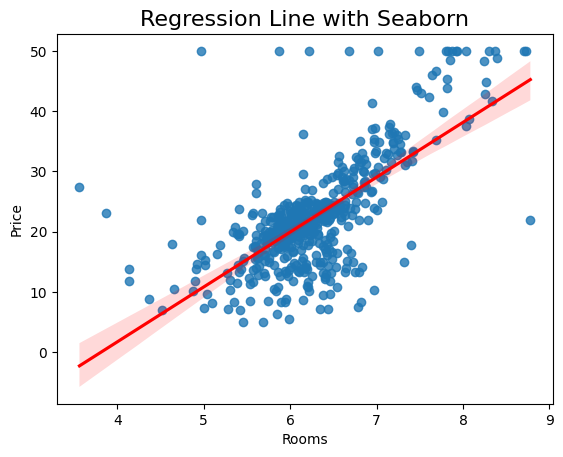

In [ ]:
sns.regplot(x=houses['Rooms'], y=houses['Price'], data=houses, line_kws={"color": "red"})
plt.title('Regression Line with Seaborn', fontsize=16)
plt.show()

## 2. Calculate and plot regression line with closed-form solution (Normal Equation)

In [ ]:
X = houses[['Rooms']].values
y = houses[['Price']].values

In [ ]:
# Concatenate 1s to the design matrix to account for the intercept term
ones = np.ones((X.shape[0], 1))
X = np.concatenate((ones, X), axis=1)

In [ ]:
# Applying Normal Equation 𝜃 = (X^TX)^-1X^TY
theta = np.linalg.inv(X.T @ X) @ X.T @ y

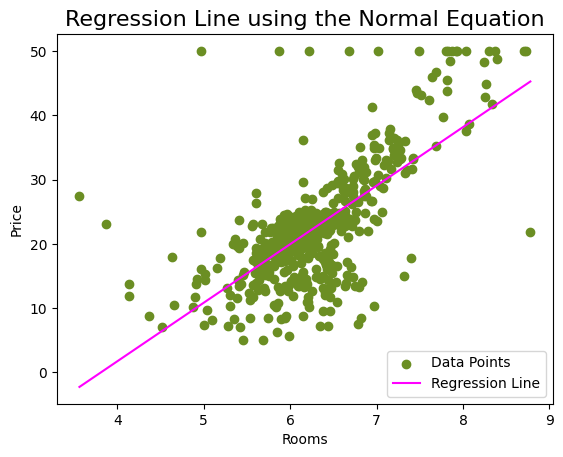

In [ ]:
# Plot the original data points
plt.scatter(houses['Rooms'], houses['Price'], color='olivedrab', label='Data Points')

# Compute the regression line
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_values = theta[0] + theta[1] * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='fuchsia', label='Regression Line')
plt.title('Regression Line using the Normal Equation', fontsize=16)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.legend()
plt.show()

## 3. Calculate and plot regression line with Stochastic Mini-batch Gradient Descent